## Surviving the Titanic Sinking 
 
 
 Download the data set from https://www.kaggle.com/c/titanic/data 
     <img src="titanic.jpg">
 while running the file make sure the new jupyter notebook is opened from the directory where the DataSet is stored
 
 ## Solution
 
 The people who survived the titanic usually were women and children of the same family and people who had seats in upper class berths so those are criteria which I felt were most appropriate
 
  When faced with so many parameters it turns difficult to analyse them by plotting graphs for all of them so I have used a much simpler approach of using the machine learning tool H2O

In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv('train.csv')

First all the null values in the data are filled with ' ' .
We know the fact that people with same last name had a chance of surviving together so i made a separate column of the last name
 

In [43]:
df.fillna(0,inplace=True)
#df['LEVEL1']=df.Cabin.map(lambda x: x[:1])
#df['LEVEL2']=df.Cabin.map(lambda x: x[2:])
#df['LNAME']=df.Name.map( lambda x: x.split(',')[0])
#df['Ticket']=df['Ticket'].astype(np.str)


## Data Analysis 
Out of all the given columns in dataset only some of them are objective . Eg : First name does not matter,but last name is crutial as most of the people who survived were part of a family.

After plotting I found out that Pclass had no effect in survival.

Age also did not give any good info as it looks almost equal the dead and living people ages

*Parch* gives some good info as people as none of people with Parch 4 survived

Also *SibSp(no. of siblings)* if greater than 4 then no one survived 

*Fare* is also effective as people with fare more that 300$ survived 

*Sex* did not give any good stats fromm the given analysis but I think it has a great deal to still reveal 
I have also craeated a dictionary. This is so I can achive good grammer stats!

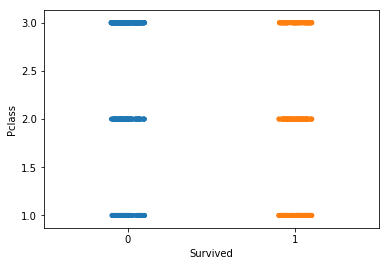

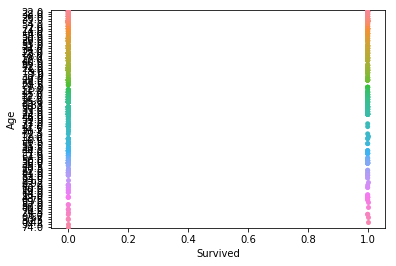

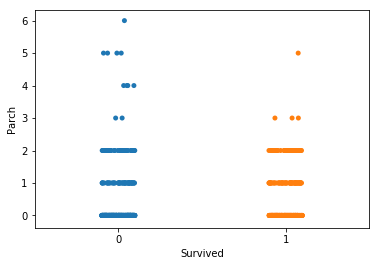

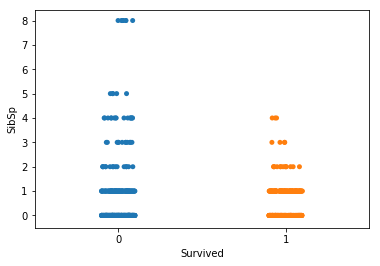

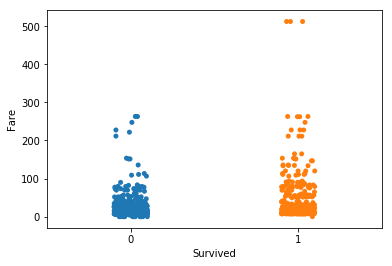

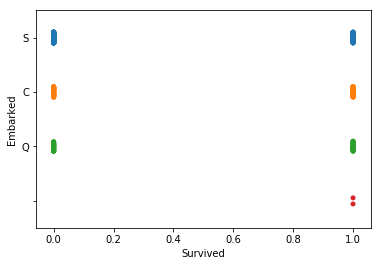

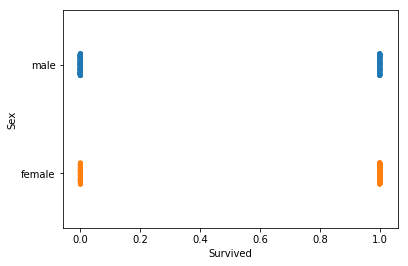

In [6]:
import seaborn as sns
sns.stripplot(x="Survived", y="Pclass", data=df, jitter=True);
plt.show()
sns.stripplot(x="Survived", y="Age", data=df, jitter=True)
plt.show()
sns.stripplot(x="Survived", y="Parch", data=df, jitter=True)
plt.show()
sns.stripplot(x="Survived", y="SibSp", data=df, jitter=True)
plt.show()
sns.stripplot(x="Survived", y="Fare", data=df, jitte
plt.show()
sns.stripplot(x="Survived", y="Embarked", data=df, jitter=True);
plt.show()
sns.stripplot(x="Survived", y="Sex", data=df, jitter=True);
plt.show()



Before implementing any machine learning techniques we need to split the data into train and test so as to check the accuracy of different algorithms which we are implementing. 


In [186]:
#breaking the original train dataset into train and test so that we  can check the efficiency of the algorithm on already 
#present data test_size = 0.1 means that 0.1 * total data is stored in the test and 0.9 is in the training set
#x_hand are the predicting variables 
#y_hand is the predicted variable in this case Survived
x_hand = df[[ 'Pclass','Age','SibSp','Parch','Fare']]
y_hand = df['Survived']
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_hand, y_hand,test_size=0.1,
                                                random_state=1)

In [200]:
# This is the random forest algorithm using 

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_hand, y_hand)
y_model = model.predict(Xtest)

In [188]:
#after values have been predicted we can check how accurate the data was 
#by matching it with ytest which was orginally a part of the training data but was separated so as to verify the model 
#before submitting 
from sklearn.metrics import accuracy_score,auc
accuracy_score(ytest, y_model)




0.9666666666666667

##### H2O is open-source software for big-data analysis. It is produced by the company H2O.ai. H2O allows users to fit thousands of potential models as part of discovering patterns in data. The H2O software runs can be called from the statistical package R, Python, and other environments.

In [52]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 1 hour 41 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,1 month and 20 days
H2O cluster name:,H2O_from_python_drsandeepabrol_7ayzl9
H2O cluster total nodes:,1
H2O cluster free memory:,1.173 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In this step we are uploading the our dataframe to the H20 mainframe 

In [189]:
#the given dataframe is imported to h2o


hf=h2o.H2OFrame(df)

# the split_frame function is used to split the given dataframe into test and train. The algorithm learns from train and applies 
# the result to test so we can check the accuracy of the algorithm. Here we break it into 2 parts train is 0.9 part of the data 

train,test = hf.split_frame(ratios=[.9])

c:\users\drsandeepabrol\appdata\local\programs\python\python36\lib\site-packages\h2o\utils\shared_utils.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [190]:
#When using AutoML the program uses a variety of techniques and chooses the best of them 
from h2o.automl import H2OAutoML


# In this examples all columns beside Surivied are predictor columns which are used to determine 
# whether the person survived the shipwreck
x=train.columns

y = 'Survived'
#factor means it is a catogorical variable (not a int or float)
#hf['Survived']=hf['Survived'].asfactor()
for r in ['PassengerId',y]:
    x.remove(r)
#This program will find the best fitting algorithm in a mamximum allocated time of 60 sec    
aml = H2OAutoML(max_runtime_secs = 60)
aml.train(x = x, y = y,
          training_frame = hf)


AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [191]:
#eaderboard” of models that were trained in the process, ranked by a default metric based on the problem type 
#(the second column of the leaderboard). In binary classification problems,
# that metric is AUC, and in multiclass classification problems, the metric is mean per-class error. 
#in regression problems, the default sort metric is root mean squared error (RMSE). 

aml.leaderboard

model_id,mean_residual_deviance,rmse,mae,rmsle
StackedEnsemble_BestOfFamily_0_AutoML_20180714_164810,0.12643,0.35557,0.252126,0.25031
GBM_grid_0_AutoML_20180714_164810_model_0,0.126794,0.356081,0.245475,0.251737
GBM_grid_0_AutoML_20180714_164810_model_2,0.126845,0.356153,0.253494,0.253059
StackedEnsemble_AllModels_0_AutoML_20180714_164810,0.12688,0.356202,0.258365,0.251026
GBM_grid_0_AutoML_20180714_164810_model_13,0.132045,0.36338,0.260517,0.256858
GBM_grid_0_AutoML_20180714_164810_model_1,0.132269,0.363688,0.257158,0.258967
GBM_grid_0_AutoML_20180714_164810_model_10,0.132313,0.363749,0.281866,0.257497
GBM_grid_0_AutoML_20180714_164810_model_3,0.135564,0.36819,0.25921,0.262878
XRT_0_AutoML_20180714_164810,0.136125,0.368952,0.260534,0.261902
DRF_0_AutoML_20180714_164810,0.137257,0.370483,0.245742,0.261495


Now after the best algo has been found , we will now implement it on the test set

In [201]:
#test=h2o.H2OFrame(pd.read_csv('test.csv'))
preds=aml.predict(test)
final=test.cbind(preds)
results=h2o.as_list(final)

Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [115]:
preds

predict,p0,p1
1,0.0151413,0.984859
0,0.943684,0.0563163
0,0.577176,0.422824
0,0.973866,0.0261341
0,0.54688,0.45312
1,0.153558,0.846442
1,0.340149,0.659851
0,0.861692,0.138308
1,0.195992,0.804008
0,0.941502,0.058498
